# 빈도 기반으로 문서의 특징 표현 및 선택

- 학습목표 : scikit-learn 라이브러리를 이용한 term-document matrix 생성하기 
- 샘플 문서집합을 통해 TF, TF-IDF 기반의 term-document matrix 가 어떻게 생성되는지 확인해보자 

- BOW(Bag Of Words) : 문서를 숫자벡터로 변환하는 기본적인 방식, 전체 문서를 구성하는 고정된 단어장을 만들고,개별 문서에 단어장에 있는 단어들이 포함되어 있는지를 표시해 줌

> Scikit-Learn이 제공하는 문서 전처리용 클래스
  - CountVectorizer : 문서 집합에서 단어 토큰을 생성하고 각 단어수를 세어 BOW 인코딩한 벡터를 만들어 줌 
  - TfidfVectorizer : CountVectorizer와 비슷하지만 TF-IDF 방식으로 단어 가중치를 조정한 BOW 벡터를 만든다 

출처 : https://datascienceschool.net/view-notebook/3e7aadbf88ed4f0d87a76f9ddc925d69/

## (1) TF 기반

#### CounterVectorizer 
 - 1. 문서를 토큰 리스트로 변환한다.CounterVectorizer(tokenizer = str.split) 설정해줌으로서 split기준으로 문자열 지정
 - 2. 각 문서에서 토큰의 출현 빈도를 센다
 - 3. 각 문서를 BOW 인코딩 벡터로 변환한다.

- 위 출처에서 datascienceschool에 있는 일단 간단한 예제부터 살펴보자

In [141]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['This is the first document.', 
          'This is the second second document.',
          'And the third one.',
          'Is this the first document?',
          'The last document?']

vectorizer = CountVectorizer(tokenizer = str.split)
vectorizer = vectorizer.fit(corpus)
vectorizer.vocabulary_  # 토큰리스트 변환 , 각각의 문자가 어떤 숫자로 변환되었는지 확인 

#그럼 이제 열방향으로 10개의 변수가 생성이 될 것이야
# ['and', 'document.' 'document?', ... ] 이렇게 숫자 순서대로 10개 

{'this': 10,
 'is': 4,
 'the': 8,
 'first': 3,
 'document.': 1,
 'second': 7,
 'and': 0,
 'third': 9,
 'one.': 6,
 'document?': 2,
 'last': 5}

In [142]:
# 위에서 만들어진 vectorizer 에서 transform 해서 형태를 봐보면 
vectorizer.transform(["This is the Second Document."]).toarray()

# [0]인덱스인 두번째 원소는 'document.' 이거 이기 때문에 위에 문장에 포함되므로 1 값을 가짐 (one-hot encoding)

array([[0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1]], dtype=int64)

In [143]:
vectorizer.transform(['Something completely new.']).toarray()  # 같은 방법으로 확인 

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [144]:
vectorizer.transform(corpus).toarray()    # corpus 의 다섯줄 넣어줌 

array([[0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]], dtype=int64)

- 본격적으로 분석 시작 

- term-document matrix는 `Sparse Matrix` 기 때문에 여러가지 방법으로 압축해서 `Dense Matrix` 로 변환하는 것이 바람직함 (저장과 연산에 있어서 메모리공간의 낭비가 많기 때문에 )
- sklearn 에 counterVectorizer 클래스에 있는 `fit_transform()` 함수로 Dense Matrix로 변환 가능

In [145]:
"""scikit-learn 라이브러리를 이용한 문서-단어 행렬 생성"""
from sklearn.feature_extraction.text import CountVectorizer 
documents = ["빨강 하양 하양 검정 노랑 노랑 파랑 파랑 파랑", #빨강1,하양2, 0, 검정1,0,파랑3,노랑2
             "빨강 빨강 노랑 보라 보라 연두",                
             "연두 연두 노랑 파랑 검정 검정",
             "노랑 파랑 노랑 빨강 하양"]

vectorizer = CountVectorizer(tokenizer = str.split)     # (1) vectorizer 생성 : split 기준으로 문자열 지정
vectorizer = vectorizer.fit(documents)                  # (2) fit             : 문서와 단어의 구조를 동일하게 설정
doc_term_mat = vectorizer.transform(documents)          # (3) transform       : 문서 집합에 대해 (1), (2)적용
doc_term_mat1 = vectorizer.fit_transform(documents)     # (2)fit(), (3)transform() 합쳐서 fit_transform() 로 사용가능

vocabulary = vectorizer.vocabulary_                     # term-document matrix의 단어 집합을 추출하되 사전형으로 반환
words = vectorizer.get_feature_names()                  # term-document matrix의 단어 집합을 추출하되 리스트로 반환   


print(vocabulary)             # 이때 key는 단어(term), value는 단어의 순서(빈도가 아님)
# 즉 정리해보면 [ 검정:0 , 노랑:1 , 보라:2 , 빨강:3 ,연두:4 , 파랑:5 , 하양:6 ]  요순서로 값이 들어가게 될거야 
print(doc_term_mat.toarray()) # term-document matrix 의 구조를 추출,가로가 term(단어의 순서가 key의 value에 해당), 세로가document,행렬내 값은 빈도    
print(doc_term_mat1.toarray()) # 위와 같은 결과 출력
print("-----------------------------------")
print(words)
print(vectorizer.get_feature_names()[0],words[0])  # vocabulary에서 보듯이 인덱스 0에 해당하는 값은 검정이기 때문에 

len(doc_term_mat.toarray())

{'빨강': 3, '하양': 6, '검정': 0, '노랑': 1, '파랑': 5, '보라': 2, '연두': 4}
[[1 2 0 1 0 3 2]
 [0 1 2 2 1 0 0]
 [2 1 0 0 2 1 0]
 [0 2 0 1 0 1 1]]
[[1 2 0 1 0 3 2]
 [0 1 2 2 1 0 0]
 [2 1 0 0 2 1 0]
 [0 2 0 1 0 1 1]]
-----------------------------------
['검정', '노랑', '보라', '빨강', '연두', '파랑', '하양']
검정 검정


4

- 아래에서 볼 수 있듯 doc_term_mat 는 Dense Matrix 형태로 반환함 
- 출력형태 :  `(i번째document ,j번째단어)  빈도수`  
- 출력형태 자체로 의미파악이 어렵기 때문에 for 문과 함께 `indices`,`data`,`indptr` 메소드를 이용하면 good
 - indices메소드: 문서에 등장한 단어를 보여줌
 - data메소드: 문서에 등장한 단어의 빈도를 보여줌   

In [146]:
print(doc_term_mat) 
# 즉 (0, 0) 이건 첫번째 document에서 1번째 단어니까 검정이 되겠지! 첫번째 document 에서 1번째 단어인 검정은 1개 있다 

  (0, 0)	1
  (0, 1)	2
  (0, 3)	1
  (0, 5)	3
  (0, 6)	2
  (1, 1)	1
  (1, 2)	2
  (1, 3)	2
  (1, 4)	1
  (2, 0)	2
  (2, 1)	1
  (2, 4)	2
  (2, 5)	1
  (3, 1)	2
  (3, 3)	1
  (3, 5)	1
  (3, 6)	1


In [147]:
# indices메소드: 문서에 등장한 단어를 보여줌
# 첫번째 document 값이 "빨강 하양 하양 검정 노랑 노랑 파랑 파랑 파랑" 이거였는데 
# doc_term_mat 는 지금 [ 검정:0 , 노랑:1 , 보라:2 , 빨강:3 ,연두:4 , 파랑:5 , 하양:6 ] 이렇게 되어있다 
# 따라서 존재하는 색깔의 index 를 출력해 줌 
# [0 1 3 5 6] 이렇게 출력되었는데 검정,노랑,빨강,파랑,하양 존재한다는 의미 

for i in doc_term_mat:
    print(i.indices)
print("====================")

# data메소드: 문서에 등장한 단어의 빈도를 보여줌   
# [1 2 1 3 2] 이렇게 출력되었는데 위에 indices 에서 알려준index에 해당하는 색깔이 몇번 나왔냐 하는 빈도 
for i in doc_term_mat:
    print(i.data) 

[0 1 3 5 6]
[1 2 3 4]
[0 1 4 5]
[1 3 5 6]
[1 2 1 3 2]
[1 2 2 1]
[2 1 2 1]
[2 1 1 1]


In [148]:
print(doc_term_mat[0])
print("====================")

# doc_term_mat 의 출력결과에서는 `(문서번호,단어번호) 빈도` 이렇게 출력되었는데 i.indices 는 `단어번호` list로 묶어서 출력해줌 
for i in doc_term_mat[0]:
    print(i.indices) 
    
# doc_term_mat 의 출력결과에서는 `(문서번호,단어번호) 빈도` 이렇게 출력되었는데 i.data 는 `빈도` list로 묶어서 출력해줌 ""
print("====================")
for i in doc_term_mat[0]:
    print(i.data) 

  (0, 0)	1
  (0, 1)	2
  (0, 3)	1
  (0, 5)	3
  (0, 6)	2
[0 1 3 5 6]
[1 2 1 3 2]


In [149]:
for i in range(len(doc_term_mat.toarray())):  # i : document번호 
    for j in doc_term_mat[i]:                 # j : 단어 index 번호
        for i1, j in zip(j.indices , j.data): # i1 :빈도
            print(i,j,i1)
            #print( "{}\t{}\t{}" .format(i ,vectorizer.get_feature_names()[i1],j) )

0 1 0
0 2 1
0 1 3
0 3 5
0 2 6
1 1 1
1 2 2
1 2 3
1 1 4
2 2 0
2 1 1
2 2 4
2 1 5
3 2 1
3 1 3
3 1 5
3 1 6


In [150]:
for i in range(len(doc_term_mat.toarray())):  # i : document번호 
    for j in doc_term_mat[i]:                 # j : 
        for i1, j in zip(j.indices , j.data): # i1 : 
            #print(i,j,i1)
            print( "{}\t{}\t{}" .format(i,vectorizer.get_feature_names()[i1],j) )  # get_feature_names:단어집합을 리스트로 반환

0	검정	1
0	노랑	2
0	빨강	1
0	파랑	3
0	하양	2
1	노랑	1
1	보라	2
1	빨강	2
1	연두	1
2	검정	2
2	노랑	1
2	연두	2
2	파랑	1
3	노랑	2
3	빨강	1
3	파랑	1
3	하양	1


- 아래처럼 binary = True 옵션을 지정하여 단어빈도를 보여줄 수 있음 (단어등장하면1, 아니면0)
- 단어 빈도에 대한 정보는 사라지지만 문서의 길이가 짧거나 특정 단어의 출현 여부만 중요한 경우 사용하면 편리

In [151]:
print(doc_term_mat.toarray()) # 위에서 출력한것

"""scikit-learn 라이브러리를 이용한 문서-단어 행렬 생성"""
from sklearn.feature_extraction.text import CountVectorizer
documents = ["빨강 하양 하양 검정 노랑 노랑 파랑 파랑 파랑", 
             "빨강 빨강 노랑 보라 보라 연두",
             "연두 연두 노랑 파랑 검정 검정",
              "노랑 파랑 노랑 빨강 하양"]

vectorizer = CountVectorizer(tokenizer = str.split, binary = True)        # binary 옵션설정 
doc_term_mat = vectorizer.fit_transform(documents)

doc_term_mat.toarray()

[[1 2 0 1 0 3 2]
 [0 1 2 2 1 0 0]
 [2 1 0 0 2 1 0]
 [0 2 0 1 0 1 1]]


array([[1, 1, 0, 1, 0, 1, 1],
       [0, 1, 1, 1, 1, 0, 0],
       [1, 1, 0, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 1, 1]], dtype=int64)

- 아래처럼 ngram_range 옵션을 사용하여 N개의 단어를 하나의 단어처럼 만들어서 기존 단어에 추가할 수 있다
 - n-그램은 단어장 생성에 사용할 토큰의 크기를 결정한다. unigram은 토큰하나만 단어로 사용, bigram은 토큰을 2개씩 연결해 하나의 단어로 사용

In [173]:
"""scikit-learn 라이브러리를 이용한 문서-단어 행렬 생성"""
from sklearn.feature_extraction.text import CountVectorizer
documents = ["빨강 하양 하양 검정 노랑 노랑 파랑 파랑 파랑", 
             "빨강 빨강 노랑 보라 보라 연두",
             "연두 연두 노랑 파랑 검정 검정",
              "노랑 파랑 노랑 빨강 하양"]

vectorizer = CountVectorizer(tokenizer = str.split, ngram_range=(1,1))      # uni-gram 설졍
doc_term_mat = vectorizer.fit_transform(documents)
vocabulary = vectorizer.vocabulary_

vocabulary

{'빨강': 3, '하양': 6, '검정': 0, '노랑': 1, '파랑': 5, '보라': 2, '연두': 4}

In [174]:
doc_term_mat.toarray()

array([[1, 2, 0, 1, 0, 3, 2],
       [0, 1, 2, 2, 1, 0, 0],
       [2, 1, 0, 0, 2, 1, 0],
       [0, 2, 0, 1, 0, 1, 1]], dtype=int64)

In [175]:
"""scikit-learn 라이브러리를 이용한 문서-단어 행렬 생성"""
from sklearn.feature_extraction.text import CountVectorizer
documents = ["빨강 하양 하양 검정 노랑 노랑 파랑 파랑 파랑", 
             "빨강 빨강 노랑 보라 보라 연두",
             "연두 연두 노랑 파랑 검정 검정",
              "노랑 파랑 노랑 빨강 하양"]

vectorizer = CountVectorizer(tokenizer=str.split, ngram_range=(1,2))                  # bi-gram 설졍
doc_term_mat = vectorizer.fit_transform(documents)
vocabulary = vectorizer.vocabulary_

vocabulary

{'빨강': 11,
 '하양': 22,
 '검정': 0,
 '노랑': 3,
 '파랑': 18,
 '빨강 하양': 14,
 '하양 하양': 24,
 '하양 검정': 23,
 '검정 노랑': 2,
 '노랑 노랑': 4,
 '노랑 파랑': 7,
 '파랑 파랑': 21,
 '보라': 8,
 '연두': 15,
 '빨강 빨강': 13,
 '빨강 노랑': 12,
 '노랑 보라': 5,
 '보라 보라': 9,
 '보라 연두': 10,
 '연두 연두': 17,
 '연두 노랑': 16,
 '파랑 검정': 19,
 '검정 검정': 1,
 '파랑 노랑': 20,
 '노랑 빨강': 6}

In [176]:
doc_term_mat.toarray()

array([[1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3, 0, 0, 2,
        2, 1, 1],
       [0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0,
        0, 0, 0],
       [0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 0]], dtype=int64)

#### term-document matrix 에 포함될 단어를 제한하는 방법에는 크게 3가지가 있다

- (1) 포함될 단어의 리스트를 CountVectorizer 를 초기화할 때에 Vocabulary 선택사항으로 지정 
- (2) 불용어와 같은 제외할 단어를 stop_words 선택사항으로 지정 
- (3) 문서 집합 전체에서의 단어 빈도를 기준으로 빈도 순위 상위의 단어들만 사용 `max_features = N`사용하면 최대 N개의 feature만 선택가능
- (4) 문서 집합 전체에서의 단어 빈도를 기준으로 max_df로 지정한 값(N)을 초과하거나 min_df로 지정한 값(N)보다 미만인 경우에는 무시하기 위해서 `max_df = N` 또는 `min_df = N`을 사용하기

In [177]:
# (3)번 방법 사용해 단어 빈도가 상위 3으로 제한

"""scikit-learn 라이브러리를 이용한 문서-단어 행렬 생성"""
from sklearn.feature_extraction.text import CountVectorizer
documents = ["빨강 하양 하양 검정 노랑 노랑 파랑 파랑 파랑", 
             "빨강 빨강 노랑 보라 보라 연두",
             "연두 연두 노랑 파랑 검정 검정",
              "노랑 파랑 노랑 빨강 하양"]

vectorizer = CountVectorizer(tokenizer=str.split, max_features=3)     # max_features
doc_term_mat = vectorizer.fit_transform(documents)
vocabulary = vectorizer.vocabulary_
vocabulary

{'빨강': 1, '노랑': 0, '파랑': 2}

In [178]:
doc_term_mat.toarray()

array([[2, 1, 3],
       [1, 2, 0],
       [1, 0, 1],
       [2, 1, 1]], dtype=int64)

In [179]:
# (4)번 방법 사용해 단어 빈도가 문서 전체에서 3 미만인 경우 무시하도록 설정

"""scikit-learn 라이브러리를 이용한 문서-단어 행렬 생성"""
from sklearn.feature_extraction.text import CountVectorizer
documents = ["빨강 하양 하양 검정 노랑 노랑 파랑 파랑 파랑", 
             "빨강 빨강 노랑 보라 보라 연두",
             "연두 연두 노랑 파랑 검정 검정",
              "노랑 파랑 노랑 빨강 하양"]

vectorizer = CountVectorizer(tokenizer=str.split, min_df=3)      # min_df
doc_term_mat = vectorizer.fit_transform(documents)
vocabulary = vectorizer.vocabulary_                                     
vocabulary 

{'빨강': 1, '노랑': 0, '파랑': 2}

In [181]:
doc_term_mat.toarray()

array([[2, 1, 3],
       [1, 2, 0],
       [1, 0, 1],
       [2, 1, 1]], dtype=int64)

In [183]:
# (2) 방법 사용해 불용어 my_stop_words 지정해준 후 제외하고 출력할 수 있도록 

"""scikit-learn 라이브러리를 이용한 문서-단어 행렬 생성"""
from sklearn.feature_extraction.text import CountVectorizer
documents = ["빨강 하양 하양 검정 노랑 노랑 파랑 파랑 파랑", 
             "빨강 빨강 노랑 보라 보라 연두",
             "연두 연두 노랑 파랑 검정 검정",
              "노랑 파랑 노랑 빨강 하양"]


my_stop_words = ["파랑"]

vectorizer = CountVectorizer(tokenizer=str.split, stop_words = my_stop_words)        # 불용어 지정 
doc_term_mat = vectorizer.fit_transform(documents)
vocabulary = vectorizer.vocabulary_                                     
vocabulary 

{'빨강': 3, '하양': 5, '검정': 0, '노랑': 1, '보라': 2, '연두': 4}

In [184]:
doc_term_mat.toarray()              

array([[1, 2, 0, 1, 0, 2],
       [0, 1, 2, 2, 1, 0],
       [2, 1, 0, 0, 2, 0],
       [0, 2, 0, 1, 0, 1]], dtype=int64)

## (2) TF-IDF 기반

#### TfdifVectorizer
- term-document matrix 값인 단어 가중치로 `tfdif` 를 사용할 경우에 scikit-learn 라이브러리에서 제공하는 `TfdifVectorizer`사용

In [187]:
"""scikit-learn 라이브러리를 이용한 문서-단어 행렬 생성"""
from sklearn.feature_extraction.text import TfidfVectorizer
documents = ["빨강 하양 하양 검정 노랑 노랑 파랑 파랑 파랑", 
             "빨강 빨강 노랑 보라 보라 연두",
             "연두 연두 노랑 파랑 검정 검정",
              "노랑 파랑 노랑 빨강 하양"]

vectorizer = TfidfVectorizer(tokenizer=str.split)
doc_term_mat = vectorizer.fit_transform(documents)
vocabulary = vectorizer.vocabulary_                                     
vocabulary

{'빨강': 3, '하양': 6, '검정': 0, '노랑': 1, '파랑': 5, '보라': 2, '연두': 4}

In [189]:
doc_term_mat.toarray()

array([[0.27413531, 0.36289471, 0.        , 0.22193616, 0.        ,
        0.66580848, 0.54827062],
       [0.        , 0.20431324, 0.78304715, 0.49980885, 0.30868168,
        0.        , 0.        ],
       [0.66322944, 0.21949239, 0.        , 0.        , 0.66322944,
        0.2684707 , 0.        ],
       [0.        , 0.6567178 , 0.        , 0.40163007, 0.        ,
        0.40163007, 0.49609304]])

## 정규화 TF-IDF

- TfidVectorizer 클래스에서는 정규화(normalization) 기능을 지원, default로 L2정규화 값을 출력함 

> L1 정규화 : 분모를 해당 문서 내의 용어 빈도의 절대값을 합한 값으로 사용.
$$\frac{용어 빈도}{해당 문서 내의 용어 빈도 절대값 합계} =  \frac{w}{\sum_{i=1}^{n}|w_i|} $$
   
> L2 정규화 :분모를 Euclidean norm 으로 계산. 즉 벡터의 길이, 크기(magnitude)로 나눈다
$$\frac{용어 빈도}{해당 문서 내의 용어 빈도 제곱합의 제곱근} =  \frac{w}{\sqrt{\sum_{i=1}^{n}w_i^2}}$$

In [194]:
"""scikit-learn 라이브러리를 이용한 문서-단어 행렬 생성"""
from sklearn.feature_extraction.text import TfidfVectorizer
documents = ["빨강 하양 하양 검정 노랑 노랑 파랑 파랑 파랑", 
             "빨강 빨강 노랑 보라 보라 연두",
             "연두 연두 노랑 파랑 검정 검정",
              "노랑 파랑 노랑 빨강 하양"]

vectorizer = TfidfVectorizer(tokenizer = str.split, norm = "l1") # L1 정규화 이용 
doc_term_mat = vectorizer.fit_transform(documents)
vocabulary = vectorizer.vocabulary_
print(vocabulary)
doc_term_mat.toarray()

{'빨강': 3, '하양': 6, '검정': 0, '노랑': 1, '파랑': 5, '보라': 2, '연두': 4}


array([[0.13223798, 0.17505392, 0.        , 0.10705804, 0.        ,
        0.32117411, 0.26447595],
       [0.        , 0.1137696 , 0.43603126, 0.27831311, 0.17188603,
        0.        , 0.        ],
       [0.36553208, 0.12097097, 0.        , 0.        , 0.36553208,
        0.14796486, 0.        ],
       [0.        , 0.33573311, 0.        , 0.2053249 , 0.        ,
        0.2053249 , 0.25361709]])

In [195]:
"""scikit-learn 라이브러리를 이용한 문서-단어 행렬 생성"""
from sklearn.feature_extraction.text import TfidfVectorizer
documents = ["빨강 하양 하양 검정 노랑 노랑 파랑 파랑 파랑", 
             "빨강 빨강 노랑 보라 보라 연두",
             "연두 연두 노랑 파랑 검정 검정",
              "노랑 파랑 노랑 빨강 하양"]

vectorizer = TfidfVectorizer(tokenizer=str.split, norm="l2")        # norm="l2" 를 지정하지 않을 때와 출력 값 동일
doc_term_mat = vectorizer.fit_transform(documents)
vocabulary = vectorizer.vocabulary_
print(vocabulary)
doc_term_mat.toarray()

{'빨강': 3, '하양': 6, '검정': 0, '노랑': 1, '파랑': 5, '보라': 2, '연두': 4}


array([[0.27413531, 0.36289471, 0.        , 0.22193616, 0.        ,
        0.66580848, 0.54827062],
       [0.        , 0.20431324, 0.78304715, 0.49980885, 0.30868168,
        0.        , 0.        ],
       [0.66322944, 0.21949239, 0.        , 0.        , 0.66322944,
        0.2684707 , 0.        ],
       [0.        , 0.6567178 , 0.        , 0.40163007, 0.        ,
        0.40163007, 0.49609304]])

- use_idf 옵션 : TF-IDF 계산에서 IDF 곱하지 않도록 할 수 있음 

In [206]:
"""scikit-learn 라이브러리를 이용한 문서-단어 행렬 생성"""
from sklearn.feature_extraction.text import TfidfVectorizer
documents = ["빨강 하양 하양 검정 노랑 노랑 파랑 파랑 파랑", 
             "빨강 빨강 노랑 보라 보라 연두",
             "연두 연두 노랑 파랑 검정 검정",
              "노랑 파랑 노랑 빨강 하양"]

# 생성(tokenizer)
count_vectorizer = CountVectorizer(tokenizer = str.split)
tfidf_vectorizer = TfidfVectorizer(tokenizer = str.split, use_idf = False, norm = None)  # IDF곱하지않고 정규화도하지않음 
# 문서에 적용(fit, transform) 
count_doc_term_mat = count_vectorizer.fit_transform(documents)
tfidf_doc_term_mat = tfidf_vectorizer.fit_transform(documents)

# 출력 -> 같은 결과 나옴 !!!! 
print(count_doc_term_mat.toarray())
print(tfidf_doc_term_mat.toarray())

[[1 2 0 1 0 3 2]
 [0 1 2 2 1 0 0]
 [2 1 0 0 2 1 0]
 [0 2 0 1 0 1 1]]
[[1. 2. 0. 1. 0. 3. 2.]
 [0. 1. 2. 2. 1. 0. 0.]
 [2. 1. 0. 0. 2. 1. 0.]
 [0. 2. 0. 1. 0. 1. 1.]]


### 실제 텍스트 불러와 TF, TF-IDF 기반의 term-document matrix 생성 

In [213]:
"""형태소 분석 후 파일을 불러와 TF 기반의 term-document matrix 생성"""
from operator import itemgetter
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import ujson

FEATURE_POS = ["Noun", "Verb", "Adverb", "Adjective", "Exclamation", "Determiner"]
POS_KEY = "review_pos"


"""file_name에 지정해준 파일을 읽은 후 CountVectorizer 에 입력할 파일 형태로 document set 생성"""
def read_documents(input_file_name):
    documents = []
    with open(input_file_name, "r", encoding = "utf-8") as input_file:
        for line in input_file:
            json_obj = ujson.loads(line)  # line 을 load
            text_pos = json_obj[POS_KEY]  # 위에서 POS_KEY 지정해 준 열 가져와서 text_pos로 지정해 놓음 
            
            words = []
            for sent_pos in text_pos:
                for word, pos in sent_pos:
                    if pos not in FEATURE_POS:  # 원하는 품사 가진 단어만 출력 
                        continue
                    words.append(word)          # pos 말고 word만 저장한 words 리스트 저장 
            document = " ".join(words)          # 만들어놓은 words 리스트를 " " 기준으로 join
            documents.append(document)          # 최종적으로 documents 에 저장 
    documents = np.asarray(documents)            # asarray 형태로 변경 
    return(documents)


"""TF 기반의 term-document matrix 생성해서 TSV 파일 형태로 저장"""
def main():
    # 파일 지정 
    input_file_name = r"pos_movie.txt"
    output_file_name = "tf_pos_movie.txt"
    documents = read_documents(input_file_name)  # input 데이터 읽어줘라 
    
    vectorizer = CountVectorizer(tokenizer = str.split, max_features = 100)    # max_features 최대 100개의 feature만 선택가능
    doc_term_mat = vectorizer.fit_transform(documents)
    
    ## 파일저장
    with open(output_file_name, "w", encoding = "utf-8") as output_file:
        
        doc_num = len(doc_term_mat.toarray())
        for i in range(doc_num):
            for j in doc_term_mat[i]:
                for i1,j in zip(j.indices, j.data):
                    print("{}\t{}\t{}".format(i, vectorizer.get_feature_names()[i1], j), file = output_file)
                    #print(i,vectorizer.get_feature_names()[i1],j)
main()

## ndarray
- ndarray : 같은 종류만의 데이터를 담을 수 있는 다차원배열 , numpy 라이브러리에서 ndarray 지원해줌
 - shape : 모든 배열은 각 차원의 크기를 알려주는 튜플로, 차원의 구조를 볼 때 사용, 즉 (행, 열)로 표시 
 - dtype : 배열에 저장된 자료를 알려주는 객체 
 
## asarray
- 입력데이터를 ndarray로 변환, 이미 ndarray 일 경우에는 새로 메모리에 ndarray 생성되지 않음 

In [219]:
import numpy as np
number = [[1,3,4], [2,3,1], [3,4,1]]
#number = [["가",3,4], ["나",3,1], [3,4,1]]
#number = [("가",3,4), ("나",3,1), (3,4,1)]
#number = ([1,3,4], [2,3,1], [3,4,1])

nd_number = np.array(number)
nd_number1 = np.asarray(nd_number)

print(nd_number)
print(nd_number.shape)
print(nd_number.dtype)
print("===============")
print(nd_number1)
print(nd_number1.shape)
print(nd_number1.dtype)

[[1 3 4]
 [2 3 1]
 [3 4 1]]
(3, 3)
int32
[[1 3 4]
 [2 3 1]
 [3 4 1]]
(3, 3)
int32


## Word Colud

In [227]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 파일 불러들이고 word 빼기 
input_file_name = r"tf_pos_movie.txt"
with open(input_file_name, "r", encoding = "utf-8") as input_file:
    keywords = {}
    for line in input_file:
        line = line.rstrip().split("\t")
        doc, word, tf_idf = line
        keywords[word] = float(tf_idf)
print(keywords)

{'점': 2.0, '영화': 1.0, '이': 1.0, '명작': 3.0, '연기력': 1.0, '재미': 1.0, '스토리': 1.0, '진짜': 2.0, '한': 1.0, '황정민': 1.0, '마지막': 1.0, '수': 1.0, '없이': 1.0, '배우': 1.0, '잘': 1.0, '보고': 1.0, '보는': 1.0, '다시': 1.0, '최고': 1.0, '내용': 1.0, '하는': 1.0, '너무': 1.0, '감독': 1.0, '느낌': 1.0, '내': 2.0, '정말': 1.0, '연기': 1.0, '반전': 1.0, '있는': 1.0, '듯': 1.0, '장면': 1.0, '많이': 1.0, '그': 1.0, '말': 1.0, '거': 1.0, '것': 1.0, '몰입': 1.0, '작품': 1.0, '입니다': 2.0, '걸': 1.0, '재밌게': 1.0, '수준': 1.0, '더': 1.0, '사람': 1.0, '현실': 1.0, '유해진': 2.0, '웃음': 1.0, '저': 1.0, '처음': 1.0, '할': 1.0, '정도': 1.0, '한국': 1.0, '본': 1.0, '특히': 1.0, '없고': 1.0, '없다': 2.0, '안': 2.0, '내내': 1.0, '없는': 1.0, '캐릭터': 1.0, '왜': 1.0, '하나': 1.0, '임': 1.0, '그냥': 1.0, '이런': 1.0, '돈': 1.0, '생각': 1.0, '한번': 1.0, '뭐': 1.0, '연출': 1.0, '다': 1.0, '끝': 3.0, '시간': 1.0, '중간': 2.0, '부분': 2.0, '해서': 1.0, '봐도': 1.0, '감동': 2.0, '볼': 1.0, '때문': 1.0, '번': 1.0, '느와르': 2.0, '무간도': 1.0, '좀': 1.0, '인생': 1.0, '신세계': 1.0, '별로': 1.0, '최악': 2.0, '한국영': 1.0, '때': 1.0, '봤는데': 1.0, '평점': 1.0, '

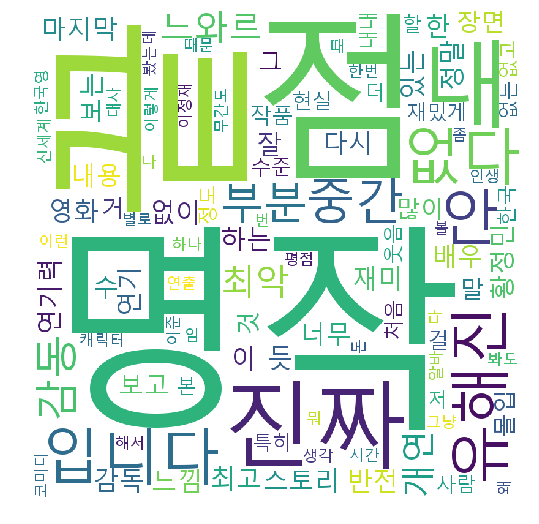

In [224]:
# 워드클라우드 배경 설정
font_path = 'C:\\Windows\\Fonts\\malgun.ttf' 
#wordcloud = WordCloud()
wordcloud = WordCloud(font_path = font_path, width = 800, height = 800, background_color = "white")

# 실행 
wordcloud = wordcloud.generate_from_frequencies(keywords)

fig = plt.figure(figsize = (12,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

fig.savefig('word_cloud_white.png')